In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading data

In [3]:
avocado_data=pd.read_csv('avocado_data.csv')

Analysing Data

In [4]:
avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


In [7]:
#checking null values-- No null values present
avocado_data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

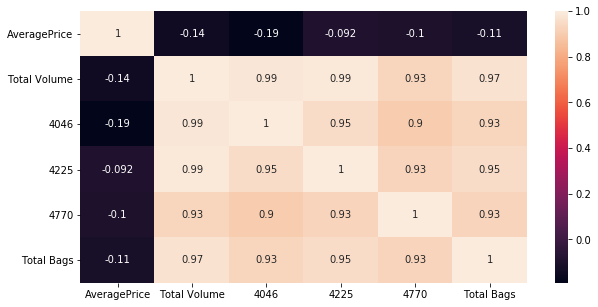

In [8]:
#checking correlation-- we can see total volume is highly correlated with total number of Hass (all PLC) avocados sold and total bags
# which is obvious since all PLC avocados sold + total bags contributes to total volume of avocados
import seaborn as sb
plt.figure(figsize=(10,5))
sb.heatmap(avocado_data.iloc[:,[1,2,3,4,5,6]].corr(),annot=True)

In [9]:
avocado_data.shape

(1517, 13)

In [10]:
avocado_data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


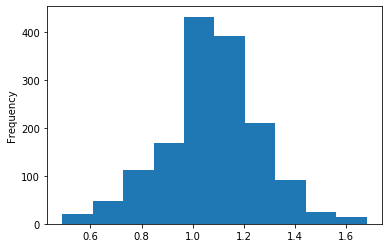

In [11]:
# average price seems normally distributed
avocado_data['AveragePrice'].plot(kind='hist')

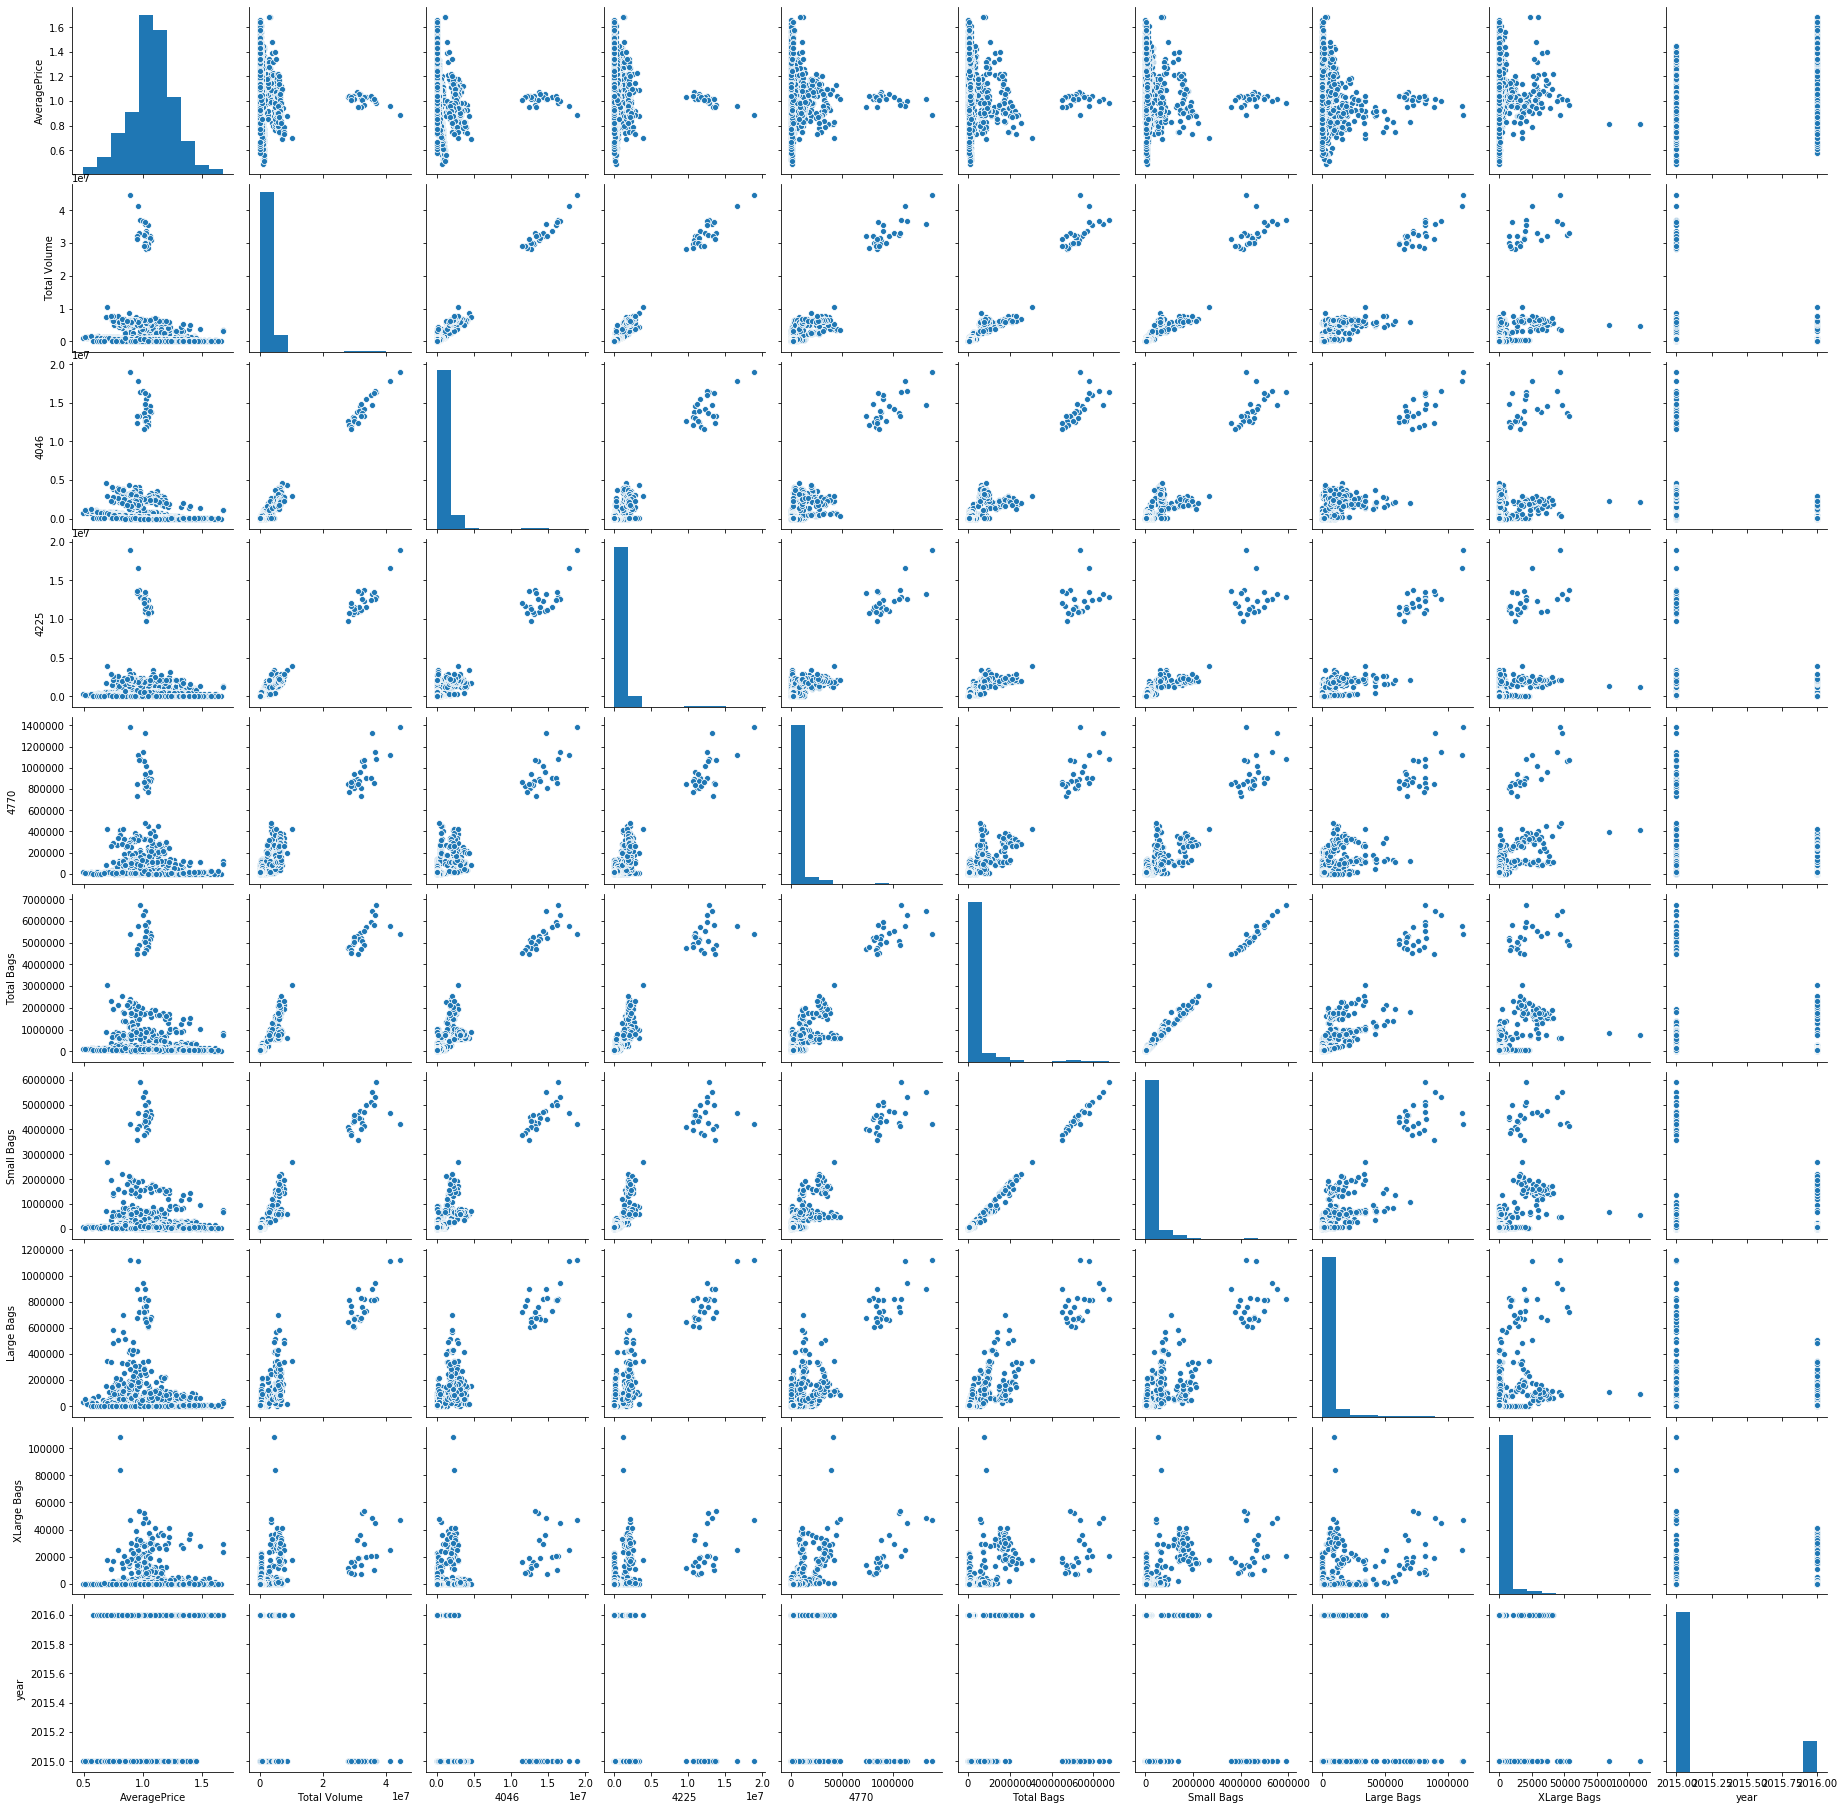

In [12]:
sb.pairplot(avocado_data)

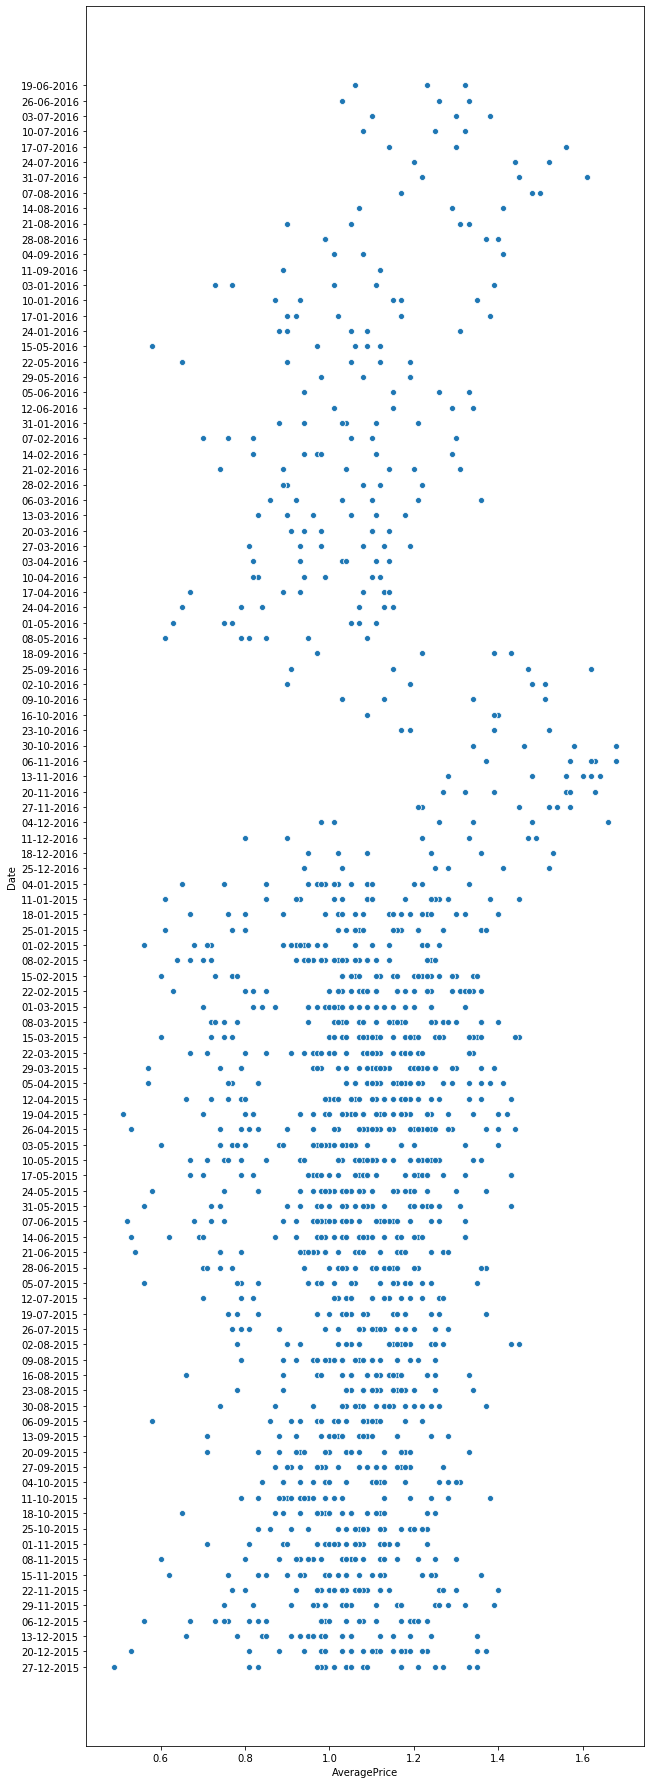

In [13]:
#chceking dates vs avg price-- Both seems to be very less correlated since every date has widely distributed average price
plt.figure(figsize=(10,32))
sb.scatterplot(x='AveragePrice',y='Date',data=avocado_data)

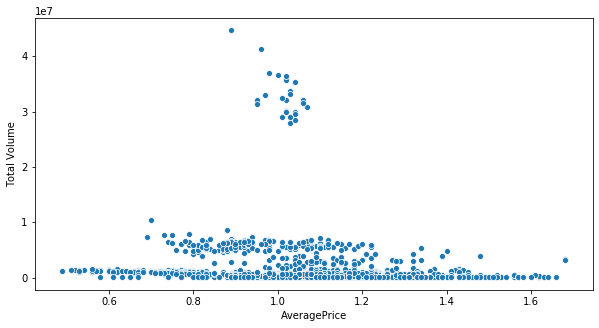

In [15]:
plt.figure(figsize=(10,5))
sb.scatterplot(y='Total Volume',x='AveragePrice',data=avocado_data)

In [16]:
# checking the total number of sold avocados by year-- in 2015 avocados were sold most
pd.DataFrame(avocado_data.groupby('year').sum()['Total Volume']).sort_values('Total Volume')

,Total Volume
year,
2016,3.852675e+08
2015,2.044783e+09


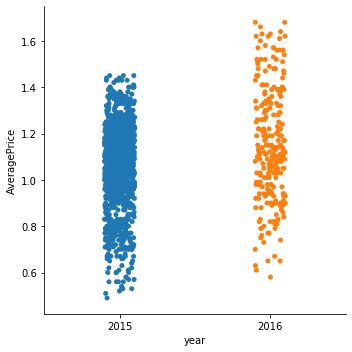

In [17]:
# checking average price by year
sb.catplot(x='year',y='AveragePrice',data=avocado_data)

In [18]:
# checking number of regions in which avocados were sold
len(avocado_data['region'].unique())

51

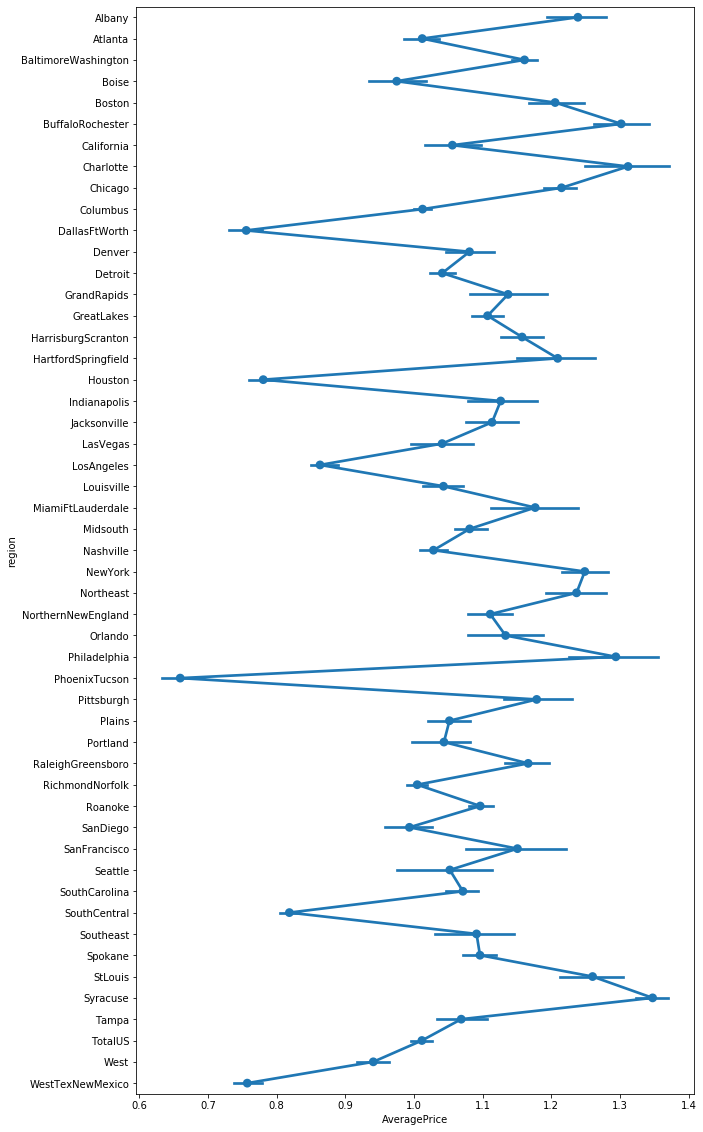

In [19]:
plt.figure(figsize=(10,20))
sb.pointplot(y='region',x='AveragePrice',data=avocado_data)

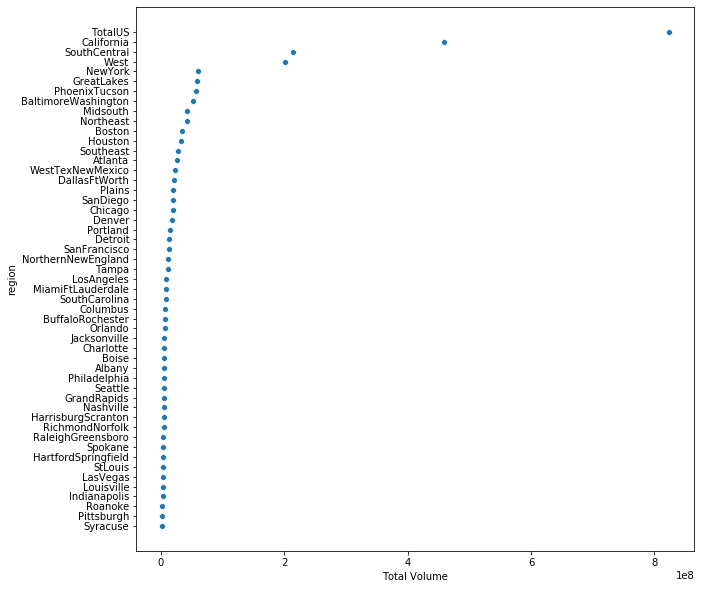

In [20]:
#checking region wise sale of avocados
plt.figure(figsize=(10,10))
df=pd.DataFrame(avocado_data.groupby('region').sum()['Total Volume']).sort_values('Total Volume')
sb.scatterplot(y=df.index,x='Total Volume',data=df)

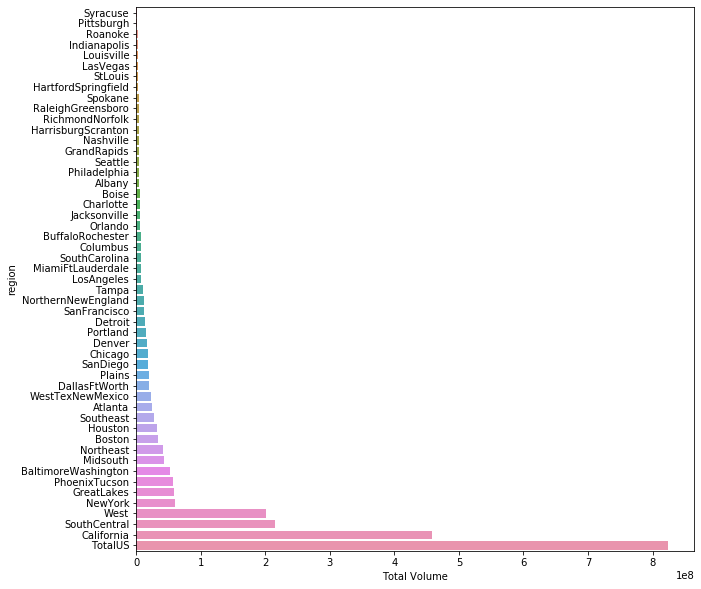

In [21]:
# viewing region wise total volume sale of avocado
plt.figure(figsize=(10,10))
sb.barplot(y=df.index,x='Total Volume',data=df)

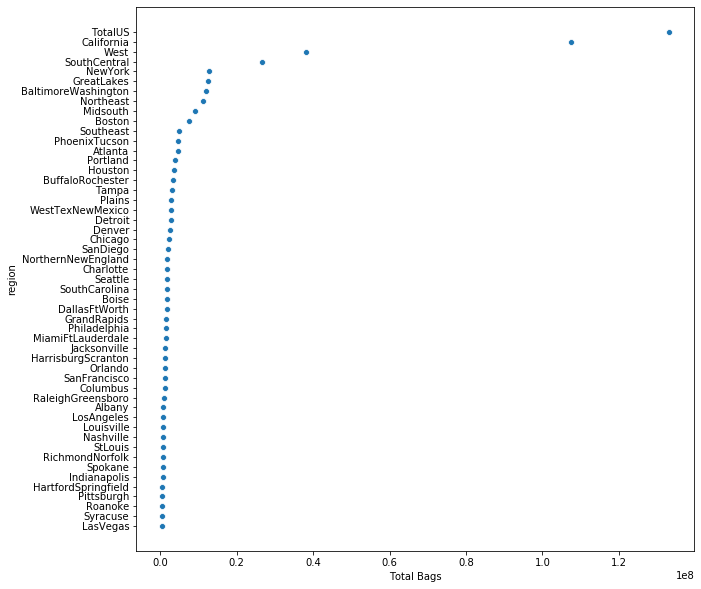

In [22]:
# cheking region wise Bags sale of avocados--- very similar to total volume sale because Total Bags contributes to Total Volume
plt.figure(figsize=(10,10))
df=pd.DataFrame(avocado_data.groupby('region').sum()['Total Bags']).sort_values('Total Bags')
sb.scatterplot(y=df.index,x='Total Bags',data=df)

In [23]:
#highest sale of avocado is in year 2016 and least sale in 2015
pd.DataFrame(avocado_data.groupby('year').sum()['Total Volume']).sort_values('Total Volume')

,Total Volume
year,
2016,3.852675e+08
2015,2.044783e+09


In [24]:
avocado_data.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [25]:
# encoding string values
avocado=avocado_data.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

avocado.drop(['Date','type'],axis=1,inplace=True)
for i in ['year','region']:
    le.fit(avocado[i])
    avocado[i]=le.transform(avocado[i])

In [26]:
avocado.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
1356,0.74,93951.14,37807.51,9084.55,4890.81,42168.27,42111.91,50.05,6.31,1,3


In [53]:
from scipy.stats import zscore
z=abs(zscore(avocado))
avocado_no_outlier=avocado[(z<3).all(axis=1)]
print(avocado.shape)
print(avocado_no_outlier.shape)
print(avocado.shape[0]-avocado_no_outlier.shape[0],'rows removed as outliers')

(1517, 11)
(1436, 11)
81 rows removed as outliers


In [54]:
avocado_no_outlier.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

Dealing with skewness:

In [55]:
# using yeo johnson's method
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
for i in avocado_no_outlier.columns:
    if((abs(avocado_no_outlier[i].skew())>0.55) & (i!='Total Volume')):
        avocado_no_outlier.loc[:,[i]]=PowerTransformer().fit_transform(avocado_no_outlier.loc[:,[i]])

In [56]:
avocado_no_outlier.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
year            2.004439
region          0.276276
dtype: float64

In [57]:
avocado_no_outlier.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

In [59]:
avocado_no_outlier['Total Volume']=np.log(avocado_no_outlier['Total Volume'])
avocado_no_outlier['Total Volume'].skew()

0.462892083747968

In [61]:
avocado_no_outlier.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,11.070329,-1.729267,-0.506157,-1.648277,-2.007481,-1.828720,-1.060475,-0.846959,-0.41387,0
1,1.35,10.912849,-1.884928,-0.633773,-1.594456,-1.912024,-1.731311,-1.050679,-0.846959,-0.41387,0
2,0.93,11.680304,-1.825915,-0.060328,-1.356590,-2.078394,-1.903000,-1.038178,-0.846959,-0.41387,0
3,1.08,11.277104,-1.696994,-0.327182,-1.531747,-2.451762,-2.296677,-0.979183,-0.846959,-0.41387,0
4,1.28,10.840357,-1.764471,-0.645393,-1.519205,-2.382008,-2.235649,-0.886387,-0.846959,-0.41387,0


Observation-- Most skewness is removed

Scaling the data:

In [62]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
avocado_standard_scaled=avocado_no_outlier.copy()
avocado_minmax_scaled=avocado_no_outlier.copy()
avocado_standard_scaled.iloc[:,1:]=StandardScaler().fit_transform(avocado_standard_scaled.iloc[:,1:])
avocado_minmax_scaled.iloc[:,1:]=MinMaxScaler().fit_transform(avocado_minmax_scaled.iloc[:,1:])

In [63]:
avocado_standard_scaled.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
year            2.004439
region          0.276276
dtype: float64

In [64]:
avocado_minmax_scaled.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
year            2.004439
region          0.276276
dtype: float64

# Model Preparation for classification model:

In [65]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [66]:
# checking whether the dataset is balanced or imbalanced on region as classifier
avocado_no_outlier.groupby('region').count()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
0,67,67,67,67,67,67,67,67,67,67
1,54,54,54,54,54,54,54,54,54,54
2,65,65,65,65,65,65,65,65,65,65
3,65,65,65,65,65,65,65,65,65,65
4,62,62,62,62,62,62,62,62,62,62
5,50,50,50,50,50,50,50,50,50,50
6,40,40,40,40,40,40,40,40,40,40
7,31,31,31,31,31,31,31,31,31,31
8,23,23,23,23,23,23,23,23,23,23


observation: Dataset is imbalanced on region

In [67]:
# preparing a method to get metric at best random state
def classification_bestrandomstate(x,y,test_size,model):
    max=0
    ind=0
    for i in range(0,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i,stratify=y)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < accuracy_score(test_y,pred)):
                max=accuracy_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind,stratify=y)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('Best Accuracy score :\n',accuracy_score(test_y,pred),'at random state',ind)
    print('\nConfusion Matrix :\n',confusion_matrix(test_y,pred))
    print('\nclassification_report :\n',classification_report(test_y,pred))

In [68]:
#skipping large bags and year column since it has very high skewness
X=avocado_no_outlier.iloc[:,0:-1]
Y=avocado_no_outlier.iloc[:,-1]

In [69]:
X_sscaled=StandardScaler().fit_transform(X)
X_mscaled=MinMaxScaler().fit_transform(X)

In [71]:
models=[KNeighborsClassifier(),DecisionTreeClassifier(),SVC()]
for i,k in zip(models,['KNeighbor','DecisionTree','SVC']):
    print('$$$$$$$$$$$$$$$',k,'$$$$$$$$$$$$$$')
    classification_bestrandomstate(X,Y,0.2,i)

$$$$$$$$$$$$$$$ KNeighbor $$$$$$$$$$$$$$
Best Accuracy score :
 0.96875 at random state 19

Confusion Matrix :
 [[14  0  0 ...  0  0  0]
 [ 0 10  0 ...  1  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  1  0 ...  6  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  5]]

classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      0.91      0.87        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
   

Observations:
1-KNeighbor classifier is giving best avg f1 score of 96% followed by DecisionTree

2- Scaling the data is not making impact on accuracy

Checking for cross validation on metric weighted f1 score. Reason for not taking metric 'acccuracy_score' is because it can give wrong results in case of imbalanced dataset

In [72]:
scores=cross_val_score(KNeighborsClassifier(),X,Y,cv=5,scoring='f1_weighted')
print(scores,'\nmean score',scores.mean(),'\nStd dev',scores.std())

[0.80241084 0.91501938 0.92449071 0.91218542 0.7690252 ] 
mean score 0.8646263090368619 
Std dev 0.06541469761022634


Obsevation-- Model is not overfitted / Underfitted

Hyperparameter tuning

In [73]:
# preparing a method for GridSearchCV

def gridsearch_classification(x,y,model,parameter_dictionary):
    #kfold=model_selection.KFold(n_splits=10,random_state=rs,shuffle=True)
    scoring=['f1_weighted','accuracy']
    for i in scoring:
        grid_cv=GridSearchCV(estimator=model,param_grid=parameter_dictionary,cv=5,scoring=i)
        grid_cv.fit(x,y)
        if(i=='f1_weighted'):
            print('\n')   
            print('best mean f1_weighted score :',grid_cv.best_score_)
            #cv_r2score.append(grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='accuracy'):
            print('\n')
            print('best mean accuracy score :',grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_) 

In [74]:
gridsearch_classification(X,Y,KNeighborsClassifier(),{'n_neighbors':range(1,100)})



best mean f1_weighted score : 0.9115264468870082
best Parameter : {'n_neighbors': 1}


best mean accuracy score : 0.9165045489740612
best Parameter : {'n_neighbors': 1}


Best score is given at parameter n_neighbors=1

In [76]:
#finding best model state at best parameter 
classification_bestrandomstate(X,Y,0.2,KNeighborsClassifier(n_neighbors=1))

Best Accuracy score :
 0.9895833333333334 at random state 75

Confusion Matrix :
 [[13  0  0 ...  0  0  0]
 [ 0 10  0 ...  1  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  5]]

classification_report :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         3
          11       0.83      1.00      0.91         5
          12       1.00      1.00

Accuracy  metric f1_weighted improved to 98%

Trying ensemble techniques:

In [75]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
gridsearch_classification(X,Y,AdaBoostClassifier(),{'n_estimators': [10,50,100,150],'learning_rate':[.0001,.001,.01,.1,1]})



best mean f1_weighted score : 0.5911595754623222
best Parameter : {'learning_rate': 0.1, 'n_estimators': 150}


best mean accuracy score : 0.6357965543941153
best Parameter : {'learning_rate': 0.1, 'n_estimators': 150}


In [77]:
gridsearch_classification(X,Y,GradientBoostingClassifier(),{'n_estimators': [50],'learning_rate':[.001]})



best mean f1_weighted score : 0.6242873648666463
best Parameter : {'learning_rate': 0.001, 'n_estimators': 50}


best mean accuracy score : 0.6225900116144019
best Parameter : {'learning_rate': 0.001, 'n_estimators': 50}


In [78]:
gridsearch_classification(X,Y,RandomForestClassifier(),{'n_estimators': [50,100,150,200]})



best mean f1_weighted score : 0.9178605302425368
best Parameter : {'n_estimators': 200}


best mean accuracy score : 0.9283149438637244
best Parameter : {'n_estimators': 150}


In [79]:
classification_bestrandomstate(X,Y,0.2,RandomForestClassifier(n_estimators=50))

Best Accuracy score :
 0.9895833333333334 at random state 75

Confusion Matrix :
 [[14  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  5]]

classification_report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      0.92      0.96        12
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00

Conclusion- 

In [80]:
print('                           best weighted f1 score        GridCV score\n')
print('KNeighborclassifier :       98%                           89%')
print('RandomForestclassifier :       99%                           91%')

                           best weighted f1 score        GridCV score

KNeighborclassifier :       98%                           89%
RandomForestclassifier :       99%                           91%


Hence Finalizing RandomForestClassifier as final model:

In [81]:
from sklearn.externals import joblib
classification_model_avocado=RandomForestClassifier(n_estimators=50)
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=65,stratify=Y)
classification_model_avocado.fit(train_x,train_y)
joblib.dump(classification_model_avocado,'classification_model_avocado')

['classification_model_avocado']

#  Model preparation for Regression:

In [82]:
#importing libraries for model
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [83]:
# preparing a method to get metric at best random state
def max_r2_score(x,y,test_size,model):
    max=0
    ind=0
    for i in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < r2_score(test_y,pred)):
                max=r2_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('max r2_score :',r2_score(test_y,pred),'at random state',ind)
    list_r2score.append(r2_score(test_y,pred))
    list_MSE.append(mean_squared_error(test_y,pred))
    list_MAE.append(mean_absolute_error(test_y,pred))
    list_RMSE.append(np.sqrt(mean_absolute_error(test_y,pred)))
    #return model

In [84]:
avocado_no_outlier.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,11.070329,-1.729267,-0.506157,-1.648277,-2.007481,-1.828720,-1.060475,-0.846959,-0.41387,0
1,1.35,10.912849,-1.884928,-0.633773,-1.594456,-1.912024,-1.731311,-1.050679,-0.846959,-0.41387,0
2,0.93,11.680304,-1.825915,-0.060328,-1.356590,-2.078394,-1.903000,-1.038178,-0.846959,-0.41387,0
3,1.08,11.277104,-1.696994,-0.327182,-1.531747,-2.451762,-2.296677,-0.979183,-0.846959,-0.41387,0
4,1.28,10.840357,-1.764471,-0.645393,-1.519205,-2.382008,-2.235649,-0.886387,-0.846959,-0.41387,0


In [87]:
x=avocado_no_outlier.iloc[:,[1,2,3,4,5,6,8,10]]
y=avocado_no_outlier.iloc[:,0]
x_mmscaled=avocado_minmax_scaled.iloc[:,[1,2,3,4,5,6,7,8,10]]
x_sscaled=avocado_standard_scaled.iloc[:,[1,2,3,4,5,6,8,10]]

In [99]:
# checking which scaing is giving better results
max=0
ind=0
for k in [x,x_sscaled,x_mmscaled]:
    
    model=LinearRegression()
    for i in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(k,y,test_size=0.2,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < r2_score(test_y,pred)):
            max=r2_score(test_y,pred)
            ind=i
    train_x,test_x,train_y,test_y=train_test_split(k,y,test_size=0.2,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    
    print('max r2_score :',r2_score(test_y,pred),'at random state',ind)

max r2_score : 0.4295046223119563 at random state 57
max r2_score : 0.4295046223119563 at random state 57
max r2_score : 0.4580236622506112 at random state 57


Observation-MinMax scaling is giving better metric values(r2 score )

Now checking various models:

In [100]:
list_r2score=[]
list_MSE=[]
list_MAE=[]
list_RMSE=[]
model_list=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(alpha=0.1),
            Ridge(alpha=0.1),ElasticNet(),SVR()]
for i,k in zip(model_list,['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']):
    print('*********',k,'*********')
    max_r2_score(x,y,0.2,i)
    print('\n')

********* LinearRegression *********
max r2_score : 0.4295046223119563 at random state 57


********* DecisionTree *********
max r2_score : 0.7581681026673276 at random state 70


********* KNN *********
max r2_score : 0.8610225088849333 at random state 88


********* Lasso *********
max r2_score : 0.07308344749358353 at random state 76


********* Ridge *********
max r2_score : 0.4296077583434631 at random state 57


********* ElasticNet *********
max r2_score : 0.01643798703848931 at random state 80


********* SVR *********
max r2_score : 0.45196783013589326 at random state 98




In [101]:

col=['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']
pd.DataFrame([list_r2score,list_MSE,list_RMSE,list_MAE],index=['R2','MSE','RMSE','MAE'],columns=col)

,LinearRegression,DecisionTree,KNN,Lasso,Ridge,ElasticNet,SVR
R2,0.429505,0.758168,0.861023,0.073083,0.429608,0.016438,0.451968
MSE,0.020924,0.008143,0.005191,0.034024,0.020920,0.032870,0.019146
RMSE,0.340602,0.250347,0.231781,0.375317,0.340578,0.373049,0.328681
MAE,0.116010,0.062674,0.053722,0.140863,0.115994,0.139165,0.108031


Observation: Best metric results are given by KNN

Now checking cross validation score using grid search function:

In [102]:
#preparing a method to perform Grid search CV to avoid redundant code. The best_score_ attribute gives cross val score
# according to the 'scoring' used in grid search so no need to do cross validation separately and also it does HYPErparameter tuning

def gridsearch(x,y,model,rs,parameter_dictionary):
    kfold=model_selection.KFold(n_splits=10,random_state=rs,shuffle=True)
    scoring=['r2','neg_mean_squared_error']
    for i in scoring:
        grid_cv=GridSearchCV(estimator=model,param_grid=parameter_dictionary,cv=kfold,scoring=i)
        grid_cv.fit(x,y)
        if(i=='r2'):
            print('\n')   
            print('best mean score(r2 score) :',grid_cv.best_score_)
            #cv_r2score.append(grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='neg_mean_squared_error'):
            print('\n')
            print('best mean score (MSE):',abs(grid_cv.best_score_))
            print('RMSE :',np.sqrt(abs(grid_cv.best_score_)))
            print('best Parameter :',grid_cv.best_params_) 

In [103]:
gridsearch(x,y,KNeighborsRegressor(),63,{'n_neighbors':range(1,100)})



best mean score(r2 score) : 0.8292827012407529
best Parameter : {'n_neighbors': 4}


best mean score (MSE): 0.005885525446775447
RMSE : 0.07671717830300752
best Parameter : {'n_neighbors': 4}


 GridSearchCV result is 82 % for metric r2_score hence we can conclude that model is not suffering underfitting or overfitting

#### Trying Ensemble technique

In [105]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor

In [109]:
max_r2_score(x_mmscaled,y,0.2,AdaBoostRegressor())

max r2_score : 0.6547562445304949 at random state 43


In [110]:
max_r2_score(x_mmscaled,y,0.2,GradientBoostingRegressor())

max r2_score : 0.7940960675086279 at random state 85


In [111]:
max_r2_score(x_mmscaled,y,0.2,RandomForestRegressor())

max r2_score : 0.8672752126164258 at random state 54


Observation-- RandomForestRegressor is giving highest r2_score
Now checking for cross validation and hyperparameter tuning

In [112]:
gridsearch(x,y,RandomForestRegressor(),54,{'n_estimators': [150,200]})



best mean score(r2 score) : 0.8194014072966906
best Parameter : {'n_estimators': 200}


best mean score (MSE): 0.006202595847076537
RMSE : 0.07875656066053505
best Parameter : {'n_estimators': 200}


Mean r2 score 82 % with best estimator of 200 hence finalizing the model.

In [113]:
from sklearn.externals import joblib
regression_model_avocado=RandomForestRegressor(n_estimators =200)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=54)
regression_model_avocado.fit(train_x,train_y)
joblib.dump(regression_model_avocado,'regression_model_avocado')

['regression_model_avocado']